In [130]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# EDA

Get some general information about our data

In [6]:
df = pd.read_csv('../data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*'Time' is a float representing seconds elapsed between each transaction and the first transaction in the dataset.*
All values are floats, asside from 'Class'.  

In [26]:
df.isna().any().all()

False

No null or NaN values.

Vizualizing class imbalance

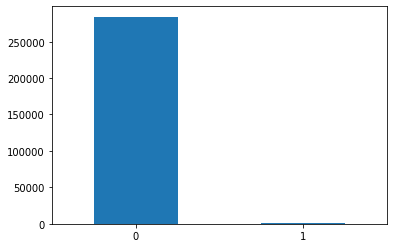

In [22]:
counts = df.Class.value_counts()
counts.plot(kind='bar', rot=1)

In [99]:
fraud = df[df.Class==1]
valid = df[df.Class==0]
print(len(fraud), len(non_fraud))

492 284315


We can get a sense of the imbalance also using the outlier fraction

In [114]:
outlier_fraction = len(fraud)/len(valid)
outlier_fraction

0.0017304750013189597

Explore 'Amount' w/in fraud and non_fraud dataframes

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [100]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Upon first glance fraudulent charges are, on average, larger than non-fraudulent charges.  However, the fraudulent charges in the dataset do not exceed a certain value (2125.87).

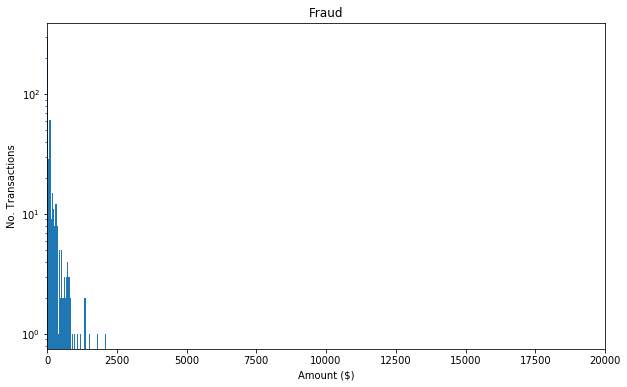

In [97]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(fraud.Amount, bins=50)
ax.set_title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('No. Transactions')
plt.xlim((0,20000))
plt.yscale('log')

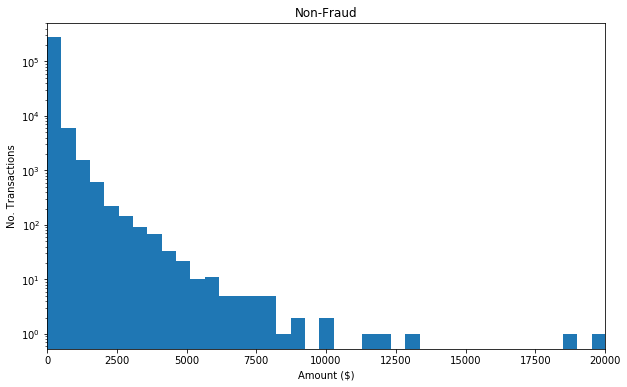

In [101]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(valid.Amount, bins=50)
ax.set_title('Non-Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('No. Transactions')
plt.xlim((0,20000))
plt.yscale('log')

Take a look at correlations

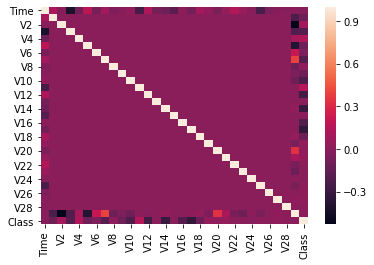

In [105]:
corr = df.corr()
sns.heatmap(corr)

# Preprocessing and Modeling

Split independent & dependent variables

In [116]:
state = np.random.RandomState(42)
X = df.drop('Class', axis=1)
y = df.Class
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

Train / test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=state)

Verify successful stratify on Y

In [118]:
y_train.value_counts()[1]/y_train.value_counts()[0], y_test.value_counts()[1]/y_test.value_counts()[0]

(0.0017304770301450037, 0.0017304689148693708)

Train and evaluate base Isolation Forest Algorithm

In [135]:
IFA = IsolationForest(n_estimators=100, contamination=outlier_fraction, random_state=state)
IFA.fit(X_train, y_train)

# classification_report(y_test, y_pred)

In [143]:
y_pred = IFA.predict(X_test)

In [126]:
(y_pred == y_test).sum()

96

In [146]:
y_pred = list(y_pred)

In [144]:
y_pred
print(Counter(y_pred))
print(Counter(y_test))

Counter({1: 71077, -1: 125})
Counter({0: 71079, 1: 123})


[]